In [1]:
# this lets us use the figures interactively
%matplotlib inline

import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

plt.ion() # make the plotting interactive

In [2]:
# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

In [3]:
def scale_bar(ax, location=(0.92, 0.95)):
    x0, x1, y0, y1 = ax.get_extent()
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    ax.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=ax.projection)
    ax.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=ax.projection)
    ax.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=ax.projection)

    ax.text(sbx, sby-4500, '20 km', transform=ax.projection, fontsize=8)
    ax.text(sbx-12500, sby-4500, '10 km', transform=ax.projection, fontsize=8)
    ax.text(sbx-24500, sby-4500, '0 km', transform=ax.projection, fontsize=8)


In [4]:
#import data file: flood, buildings, roads, population excel file, county outline, sa outline
flood= gpd.read_file(os.path.abspath('Project_datafiles/Flood_2m.shp'))
roads= gpd.read_file(os.path.abspath('Project_datafiles/Fermanagh_roads.shp'))
buildings= gpd.read_file(os.path.abspath('Project_datafiles/Building_Fermanagh.shp'))
pop_demography=gpd.read_file(os.path.abspath('Project_datafiles/pop_demography.csv'))
outline = gpd.read_file(os.path.abspath('Project_datafiles/Fermanagh_DCA.shp'))
small_area= gpd.read_file(os.path.abspath('Project_datafiles/SA_poly.shp'))
land_cover= gpd.read_file(os.path.abspath('Project_datafiles/LC_Fermanagh.shp'))

In [5]:
small_area =gpd.GeoDataFrame(pop_demography.merge(small_area, on="SA_Code"))
small_area.head()

,SA_Code,Age_75,Children_9,residents,geometry_x,SA,Shape_Leng,Shape_Area,geometry_y
0,N00002912,25,38,345,None,Ballinamallard ward,26671.860028,1.255163e+07,"POLYGON ((227161.047 350213.156, 227161.109 35..."
1,N00002921,21,31,309,None,Belcoo and Garrison ward,62798.682569,8.317093e+07,"POLYGON ((206591.234 353513.594, 206598.359 35..."
2,N00002922,33,65,468,None,Belcoo and Garrison ward,47129.291829,2.964456e+07,"POLYGON ((195507.891 357313.719, 195458.531 35..."
3,N00002924,19,31,386,None,Belleek and Boa ward,6016.303226,6.970221e+05,"POLYGON ((194939.719 358792.812, 194937.359 35..."
4,N00002925,20,43,311,None,Belleek and Boa ward,19160.475195,7.193503e+06,"POLYGON ((197286.328 359952.875, 197299.969 35..."


In [11]:
small_area= small_area.set_geometry('geometry_y')
small_area.geometry

0     POLYGON ((227161.047 350213.156, 227161.109 35...
1     POLYGON ((206591.234 353513.594, 206598.359 35...
2     POLYGON ((195507.891 357313.719, 195458.531 35...
3     POLYGON ((194939.719 358792.812, 194937.359 35...
4     POLYGON ((197286.328 359952.875, 197299.969 35...
5     POLYGON ((217257.859 365303.062, 217235.938 36...
6     POLYGON ((212900.172 360800.438, 212843.938 36...
7     POLYGON ((220325.609 345147.219, 220319.203 34...
8     POLYGON ((224635.609 343878.469, 224633.797 34...
9     POLYGON ((226659.703 344481.781, 226657.734 34...
10    POLYGON ((219265.688 352138.938, 219333.734 35...
11    POLYGON ((214762.625 357207.594, 214790.938 35...
12    POLYGON ((223555.719 345060.031, 223554.516 34...
13    POLYGON ((223486.719 344807.031, 223465.156 34...
14    POLYGON ((223129.719 345194.031, 223142.109 34...
15    POLYGON ((224110.750 344338.406, 224110.234 34...
16    POLYGON ((223045.547 347631.688, 223045.297 34...
17    POLYGON ((223980.281 345782.031, 223981.00

In [12]:
flood.to_crs(epsg = 2157)
roads.to_crs(epsg = 2157)
buildings.to_crs(epsg = 2157)
outline.to_crs(epsg = 2157)
small_area.to_crs(epsg = 2157)
land_cover.to_crs(epsg = 2157)

,SEGID,TOTPIXELS,COREPIXELS,BHSUB,LAND_COVER,Shape_Leng,Shape_Area,geometry
0,H000009r1,1785,1040,6.1,Neutral grass,20700.000000,1.115625e+06,"POLYGON ((597303.594 849201.689, 597303.594 84..."
1,H000015r1,2031,1419,7.1,Calcareous grass,17300.000000,1.269375e+06,"POLYGON ((593529.434 854200.632, 593529.434 85..."
2,H000017r1,5148,3700,10.2,Open dwarf shrub heath,33365.445406,2.699577e+06,"POLYGON ((599078.292 864323.421, 599078.291 86..."
3,H000023r1,0,0,12.1,Bog,4630.182956,4.091334e+05,"MULTIPOLYGON (((624405.618 823638.054, 624405...."
4,H000025r1,0,0,12.1,Bog,5076.466263,2.692242e+05,"MULTIPOLYGON (((614628.752 828910.970, 614628...."
...,...,...,...,...,...,...,...,...
37831,H172275r1,23,17,16.1,Inland Bare Ground,700.000000,1.437500e+04,"POLYGON ((628854.899 868778.303, 628829.904 86..."
37832,H172276r1,23,5,10.2,Open dwarf shrub heath,750.000000,1.437500e+04,"POLYGON ((629354.791 868728.311, 629354.791 86..."
37833,H172277r1,34,7,10.2,Open dwarf shrub heath,1100.000000,2.125000e+04,"POLYGON ((629354.791 868728.311, 629329.796 86..."
37834,H172278r1,36,8,12.1,Bog,1050.000000,2.250000e+04,"POLYGON ((629454.769 868678.321, 629429.774 86..."


,SA_Code,Age_75,Children_9,residents,geometry_x,SA,Shape_Leng,Shape_Area,geometry_y
0,N00002912,25,38,345,None,Ballinamallard ward,26671.860028,1.255163e+07,"POLYGON ((627106.724 850214.969, 627106.786 85..."
1,N00002921,21,31,309,None,Belcoo and Garrison ward,62798.682569,8.317093e+07,"POLYGON ((606541.361 853514.804, 606548.484 85..."
2,N00002922,33,65,468,None,Belcoo and Garrison ward,47129.291829,2.964456e+07,"POLYGON ((595460.425 857314.169, 595411.075 85..."
3,N00002924,19,31,386,None,Belleek and Boa ward,6016.303226,6.970221e+05,"POLYGON ((594892.383 858792.947, 594890.024 85..."
4,N00002925,20,43,311,None,Belleek and Boa ward,19160.475195,7.193503e+06,"POLYGON ((597238.493 859952.748, 597252.131 85..."
5,N00002928,20,51,358,None,Belleek and Boa ward,39025.517753,3.665624e+07,"POLYGON ((617205.750 865301.676, 617183.833 86..."
6,N00002929,46,101,727,None,Belleek and Boa ward,54964.774329,8.846579e+07,"POLYGON ((612848.978 860800.045, 612792.755 86..."
7,N00002932,34,38,393,None,Boho Cleenish and Letterbreen ward,41893.451556,1.710042e+07,"POLYGON ((620272.732 845150.159, 620266.327 84..."
8,N00002950,24,33,396,None,Castlecoole ward,6877.723002,5.334920e+05,"POLYGON ((624581.797 843881.660, 624579.985 84..."
9,N00002952,18,36,326,None,Castlecoole ward,12351.202175,3.218980e+06,"POLYGON ((626605.458 844484.831, 626603.489 84..."


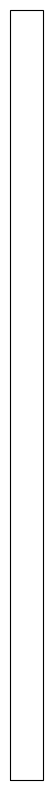

In [15]:
myFig = plt.figure(figsize=(10, 10))  # create a figure of size 10x10 (representing the page size in inches)

myCRS = ccrs.UTM(29)  # create a Universal Transverse Mercator reference system to transform our data.
# be sure to fill in XX above with the correct number for the UTM Zone that Northern Ireland is part of.

ax = plt.axes(projection=myCRS)  # finally, create an axes object in the figure, using a UTM projection,
# where we can actually plot our data.

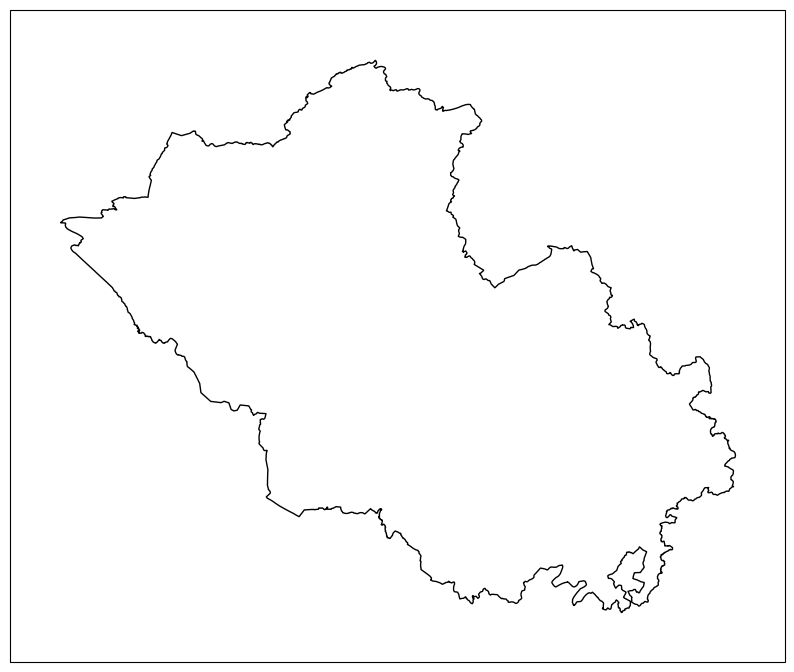

In [16]:
# first, we just add the outline of Northern Ireland using cartopy's ShapelyFeature
outline_feature = ShapelyFeature(outline['geometry'], myCRS, edgecolor='k', facecolor='w')
xmin, ymin, xmax, ymax = outline.total_bounds
ax.add_feature(outline_feature) # add the features we've created to the map.
ax.set_extent([xmin-5000, xmax+5000, ymin-5000, ymax+5000], crs=myCRS)
myFig

In [17]:
# get the number of unique municipalities we have in the dataset
landcover_type = len(land_cover.LAND_COVER.unique())
print('Number of unique features: {}'.format(landcover_type))
landcover_type=list(land_cover.LAND_COVER.unique())

Number of unique features: 14


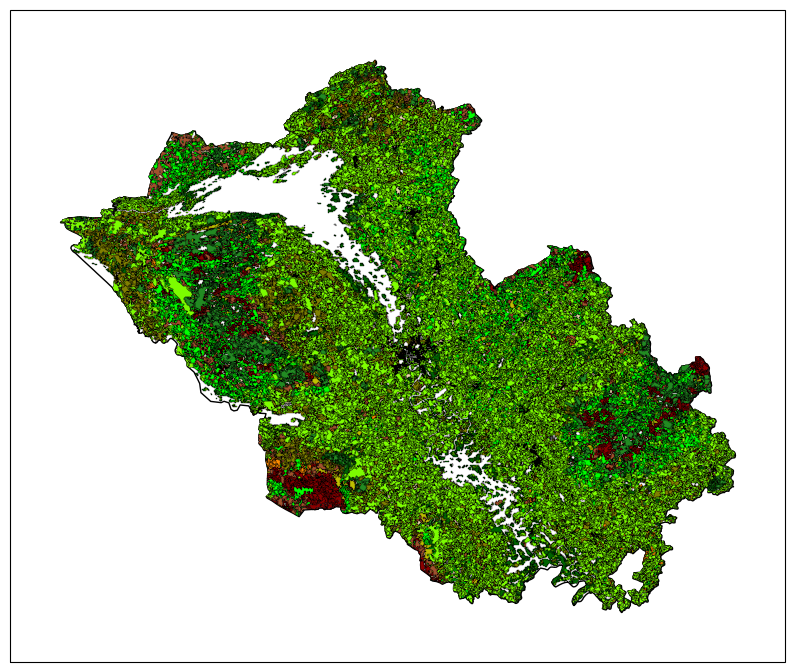

In [18]:
landcover_colors = ['lawngreen','olive', 'sienna','darkred', 'chartreuse', 'forestgreen','lime', 'y','darkgreen','darkorange','lightgrey','wheat','black','grey']
for ii, name in enumerate(landcover_type):
    feat = ShapelyFeature(land_cover.loc[land_cover['LAND_COVER'] == name, 'geometry'], # first argument is the geometry
                          myCRS, # second argument is the CRS
                          edgecolor='k', # outline the feature in black
                          facecolor=landcover_colors[ii], # set the face color to the corresponding color from the list
                          linewidth=0.25) # set the outline width to be 1 pt
                           # set the alpha (transparency) to be 0.25 (out of 1)
    ax.add_feature(feat)


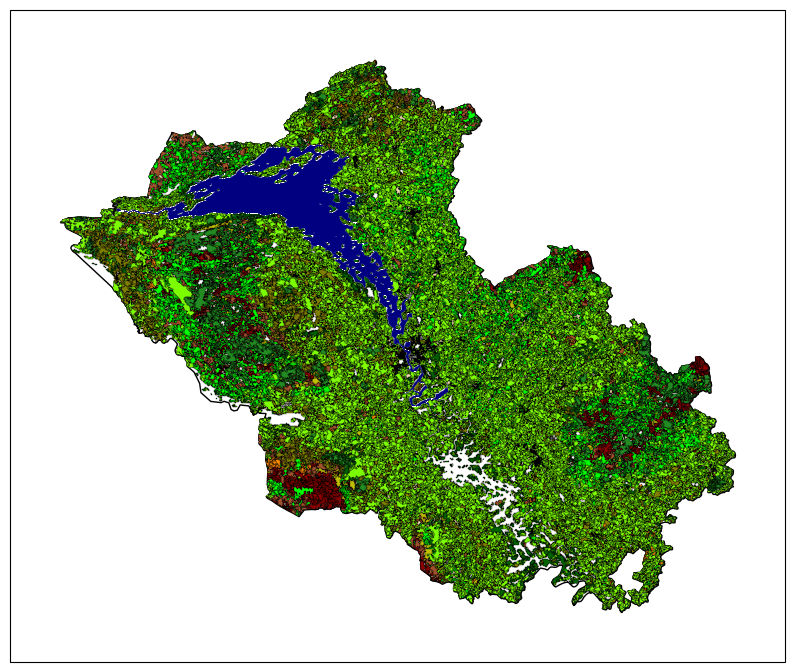

In [19]:
flood_feature = ShapelyFeature(flood['geometry'], myCRS, edgecolor='w', facecolor='navy', linewidth=0.1)
ax.add_feature(flood_feature)


In [20]:
landcover_handles = generate_handles(land_cover.LAND_COVER.unique(), landcover_colors)
flood_handles = generate_handles(['Flood'], ['navy'])

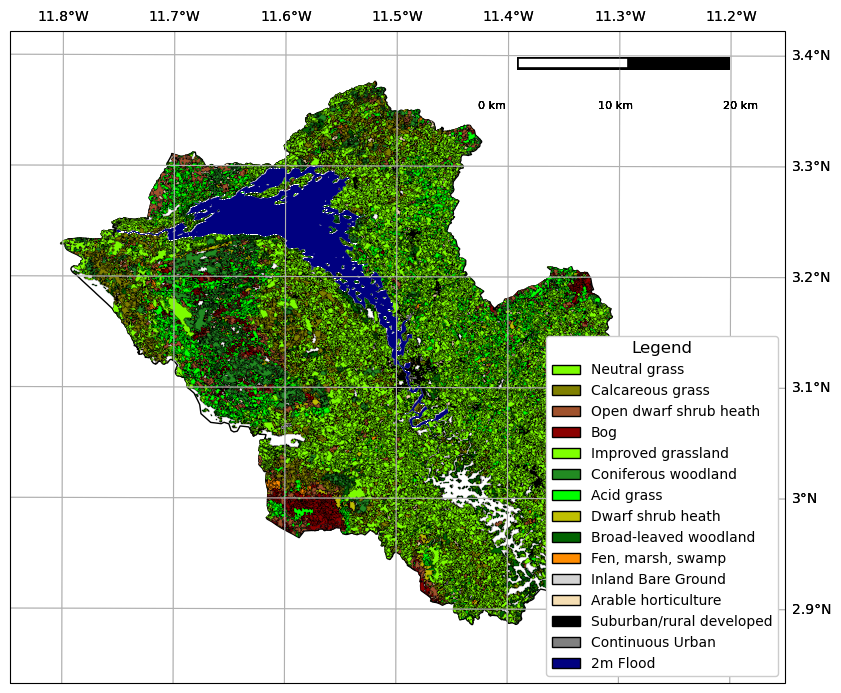

In [35]:
# ax.legend() takes a list of handles and a list of labels corresponding to the objects
# you want to add to the legend
handles = landcover_handles + flood_handles # use '+' to concatenate (combine) lists
labels = landcover_type + ['2m Flood']

leg = ax.legend(handles, labels, title='Legend', title_fontsize=12,
                 fontsize=10, loc='lower right', frameon=True, framealpha=1)

gridlines = ax.gridlines(draw_labels=True, alpha= 0.25) # draw  labels for the grid lines
                         
gridlines.left_labels = False # turn off the left-side labels
gridlines.bottom_labels = False

scale_bar(ax)
myFig # to show the updated figure

In [22]:
#create % column for elderly and child ?

In [23]:
#join sa shape file with excel pop file

In [24]:
#create column pop density

In [25]:
#all data shapefile clipped to flood polygon with within

In [26]:
#analyses:-tot pop in flood polygon
#         - nbr resident houses
#         - tot length of road impacted and class A roas
#         - Sa with highest pop density and if any are adjacent
#         - SA with less than avg pop density
#         - which landcover types has highest area in flood poly
#         - total area flooded per landcover types
#         - SA with highest % of elderly/child
#         - SA with low pop density but high child %
#         - SA with medical building
#         - residential building furtherest from medical build (use original dataset ?)
#         - SA centre furthest from medical building

In [27]:
#add scale and legend handle

In [28]:
#create map and add features to map
# do second map with landcover

In [29]:
#different labels depending on building class and road class

In [30]:
#grid lines